<a href="https://colab.research.google.com/github/abhigoel25/StudentPerformancePredictionModel/blob/main/StudentPerformancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
import io

import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms, models

In [ ]:
uploaded = files.upload()
print(uploaded)

Saving Student_performance_data _.csv to Student_performance_data _.csv
{'Student_performance_data _.csv': b'StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass\n1001,17,1,0,2,19.833722807854713,7,1,2,0,0,1,0,2.929195591667681,2.0\n1002,18,0,0,1,15.40875605584674,0,0,1,0,0,0,0,3.042914833436377,1.0\n1003,15,0,2,3,4.21056976881226,26,0,2,0,0,0,0,0.1126022544661815,4.0\n1004,17,1,0,3,10.028829473958215,14,0,3,1,0,0,0,2.0542181397029484,3.0\n1005,17,1,0,2,4.6724952729713305,17,1,3,0,0,0,0,1.2880611817953875,4.0\n1006,18,0,0,1,8.191218545250186,0,0,1,1,0,0,0,3.0841836144863937,1.0\n1007,15,0,1,1,15.601680474699295,10,0,3,0,1,0,0,2.748237414891583,2.0\n1008,15,1,1,4,15.424496305808074,22,1,1,1,0,0,0,1.360142712316461,4.0\n1009,17,0,0,0,4.562007558047703,1,0,2,0,1,0,1,2.896819189513569,2.0\n1010,16,1,0,1,18.444466363097202,0,0,3,1,0,0,0,3.5734742103297656,0.0\n1011,17,0,0,1,11.851363655296

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded["Student_performance_data _.csv"]))
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [ ]:
df = df.drop(columns = ['StudentID'])
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [ ]:
columns_to_encode = ['Ethnicity', 'ParentalEducation']
df = pd.get_dummies(df, columns = columns_to_encode).astype(float)
df

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,...,GradeClass,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4
0,17.0,1.0,19.833723,7.0,1.0,2.0,0.0,0.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18.0,0.0,15.408756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15.0,0.0,4.210570,26.0,0.0,2.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,17.0,1.0,10.028829,14.0,0.0,3.0,1.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17.0,1.0,4.672495,17.0,1.0,3.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18.0,1.0,10.680555,2.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2388,17.0,0.0,7.583217,4.0,1.0,4.0,0.0,1.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2389,16.0,1.0,6.805500,20.0,0.0,2.0,0.0,0.0,0.0,1.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2390,16.0,1.0,12.416653,17.0,0.0,2.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


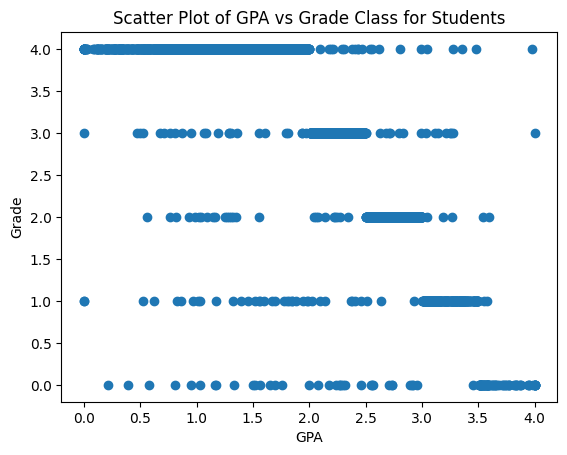

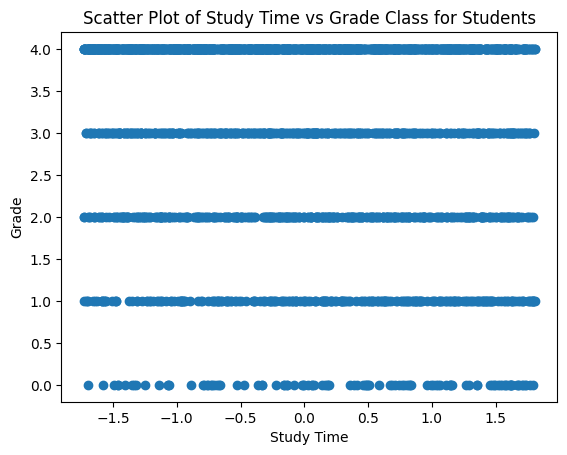

In [ ]:
grades = df['GradeClass']  #Shows that better GPA corresponds to better grade class (grade class of 0 is best grade class)
gpa = df['GPA']

plt.scatter(gpa, grades)
plt.xlabel('GPA')
plt.ylabel('Grade')
plt.title('Scatter Plot of GPA vs Grade Class for Students')
plt.show()

In [ ]:
y = df['GradeClass']
x = df.drop(columns = ['GradeClass']).values

print("x.shape", x.shape)
print("y.shape", y.shape)

print(np.isnan(x).any())
print(np.isnan(y).any())

scaler = StandardScaler()
columns_to_standardize = ['Age', 'StudyTimeWeekly', 'Absences']
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df

x.shape (2392, 20)
y.shape (2392,)
False
False


,Age,Gender,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,...,GradeClass,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4
0,0.472919,1.0,1.780336,-0.890822,1.0,2.0,0.0,0.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.362944,0.0,0.997376,-1.717694,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.307132,0.0,-0.984045,1.353542,0.0,2.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.472919,1.0,0.045445,-0.063951,0.0,3.0,1.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.472919,1.0,-0.902311,0.290422,1.0,3.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,1.362944,1.0,0.160762,-1.481445,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2388,0.472919,0.0,-0.387285,-1.245196,1.0,4.0,0.0,1.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2389,-0.417106,1.0,-0.524895,0.644796,0.0,2.0,0.0,0.0,0.0,1.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2390,-0.417106,1.0,0.467950,0.290422,0.0,2.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
class CustomTransform():
    def __call__(self, sample):
        x, y = sample
        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        return x, y

class CustomDataset(Dataset):
    def __init__(self, x, y, transform):
        self.x = x
        self.y = y
        self.transform = transform

    def __len__(self): # return how many rows are in the dataset
        return len(self.x)

    def __getitem__(self, idx): # return a single example from the dataset
        sample = (self.x[idx], self.y[idx])

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
transform = CustomTransform()
dataset = CustomDataset(x, y, transform=transform)


In [ ]:
train_size = int(0.7 * len(dataset))
dev_size = int(0.15 * len(dataset))
test_size = len(dataset) - dev_size - train_size

print(train_size)
print(dev_size)
print(test_size)

train_dataset, dev_dataset, test_dataset = random_split(dataset, [train_size, dev_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=30, shuffle=True) # training set
dev_dataloader = DataLoader(dev_dataset, batch_size=30, shuffle=False) # validation set
test_dataloader = DataLoader(test_dataset, batch_size=30, shuffle=False)


i=0
for batch_x, batch_y in train_dataloader:
    print("x.shape = {}".format(batch_x.shape), "y.shape = {}".format(batch_y.shape))
    print(batch_x)
    print(batch_y)
    i += 1
    if i > 5:
      break

1674
358
360
x.shape = torch.Size([30, 20]) y.shape = torch.Size([30])
tensor([[1.7000e+01, 0.0000e+00, 9.0465e+00, 2.0000e+01, 1.0000e+00, 3.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6720e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [1.5000e+01, 1.0000e+00, 1.2499e+01, 8.0000e+00, 1.0000e+00, 2.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7424e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00],
        [1.7000e+01, 1.0000e+00, 7.4393e-02, 2.8000e+01, 0.0000e+00, 3.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6469e-02, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00],
        [1.5000e+01, 1.0000e+00, 4.3227e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
         0.0000e+

In [ ]:
class StudentPerformanceNN(nn.Module):
  def __init__(self, input_size):
    super(StudentPerformanceNN, self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.bn1 = nn.BatchNorm1d(128)
    self.fc2 = nn.Linear(128, 64)
    self.bn2 = nn.BatchNorm1d(64)
    self.fc3 = nn.Linear(64, 32)
    self.bn3 = nn.BatchNorm1d(32)
    self.fc4 = nn.Linear(32, 5)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()

  def forward(self, x):
      x = self.fc1(x)
      x = self.bn1(x)
      x = self.relu(x)
      x = self.fc2(x)
      x = self.bn2(x)
      x = self.relu(x)
      x = self.fc3(x)
      x = self.bn3(x)
      x = self.relu(x)
      x = self.fc4(x)
      x = self.softmax(x)
      return x

Epoch [1/50], Step [26/56], Loss: 1.4803
Epoch [1/50], Step [51/56], Loss: 1.4010
Train Accuracy: 56.15%
Epoch [1/50], Step [61/12], Loss: 1.3133
Val Accuracy: 78.57%
Epoch [2/50], Step [26/56], Loss: 1.1088
Epoch [2/50], Step [51/56], Loss: 1.0117
Train Accuracy: 69.95%
Epoch [2/50], Step [61/12], Loss: 1.1515
Val Accuracy: 78.57%
Epoch [3/50], Step [26/56], Loss: 1.1666
Epoch [3/50], Step [51/56], Loss: 1.1625
Train Accuracy: 72.76%
Epoch [3/50], Step [61/12], Loss: 1.0891
Val Accuracy: 85.71%
Epoch [4/50], Step [26/56], Loss: 1.1299
Epoch [4/50], Step [51/56], Loss: 1.1543
Train Accuracy: 74.19%
Epoch [4/50], Step [61/12], Loss: 1.0811
Val Accuracy: 85.71%
Epoch [5/50], Step [26/56], Loss: 1.1333
Epoch [5/50], Step [51/56], Loss: 1.3145
Train Accuracy: 76.34%
Epoch [5/50], Step [61/12], Loss: 1.0932
Val Accuracy: 78.57%
Epoch [6/50], Step [26/56], Loss: 1.0634
Epoch [6/50], Step [51/56], Loss: 1.1586
Train Accuracy: 77.84%
Epoch [6/50], Step [61/12], Loss: 1.1163
Val Accuracy: 67.86

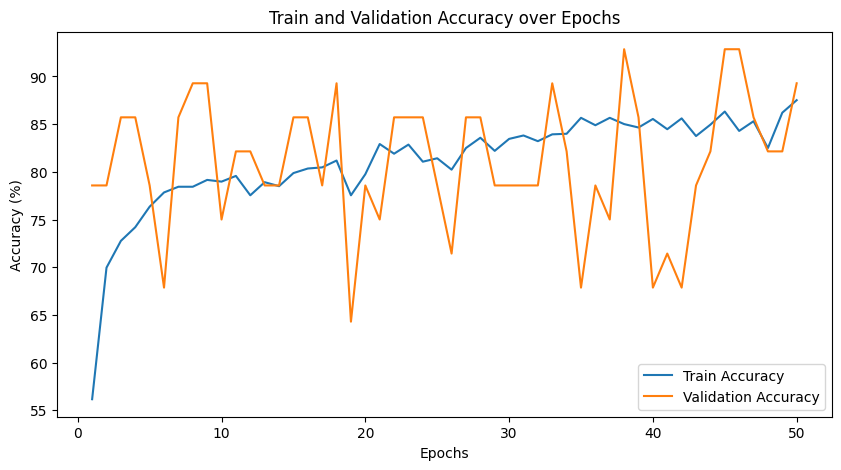

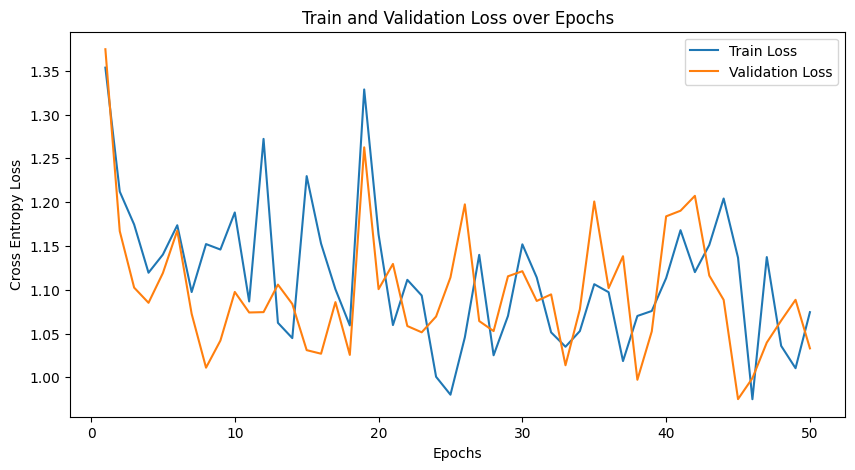

In [ ]:
# Initialize the model, loss function, and optimizer
input_size = x.shape[1]
train_accuracies = []
val_accuracies = []
train_loss =  []
val_loss = []
model = StudentPerformanceNN(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0009)


# Training loop
num_epochs = 50

for epoch in range(num_epochs):
  correct_train = 0
  total_train = 0
  i = 0
  for batch_x, batch_y in train_dataloader:

    # Forward pass
    outputs = model(batch_x)
    batch_y = batch_y.view(-1, 1) # reshaping to conform to outputs prediction shape
    batch_y = batch_y.squeeze(1).long() # removing the extra dimension
    #print(batch_y)
    #print(outputs)
    #print(batch_y)
    #print(f'Outputs shape: {outputs.shape}')  # Should be [batch_size, num_classes]
    #print(f'Targets shape: {batch_y.shape}')  # Should be [batch_size]
    loss = criterion(outputs, batch_y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted = torch.max(outputs.data, 1) # once you make predictions, torch.max takes the max probability for each example and selects the corresponding class
    total_train += batch_y.size(0)
    correct_train += (predicted == batch_y).sum().item() # how many predictions were correct
    i +=1
    if i % 25 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')
  train_accuracy = 100 * correct_train / total_train
  train_accuracies.append(train_accuracy)
  train_loss.append(loss.item())
  print(f"Train Accuracy: {train_accuracy:.2f}%")

  #Validation Loop
  for batch_x, batch_y in dev_dataloader:
    model.eval()
    correct_val = 0
    total_val = 0

    with torch.no_grad():
      outputs = model(batch_x)
      batch_y = batch_y.view(-1, 1) # reshaping to conform to outputs prediction shape
      batch_y = batch_y.squeeze(1).long() # removing the extra dimension
      loss = criterion(outputs, batch_y)

    _, predicted = torch.max(outputs.data, 1) # once you make predictions, torch.max takes the max probability for each example and selects the corresponding class
    total_val += batch_y.size(0)
    correct_val += (predicted == batch_y).sum().item() # how many predictions were correct
    i +=1
    if i % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dev_dataloader)}], Loss: {loss.item():.4f}')
  val_accuracy = 100 * correct_val / total_val
  val_accuracies.append(val_accuracy)
  val_loss.append(loss.item())

  print(f"Val Accuracy: {val_accuracy:.2f}%")


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve
from sklearn.preprocessing import label_binarize

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(

Output Prediction: tensor([4, 1, 4, 4, 4, 4, 2, 2, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 1, 4,
        1, 4, 1, 3, 4, 4])
Target Prediction: tensor([4, 1, 1, 4, 4, 4, 1, 2, 4, 3, 4, 2, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 0, 4,
        1, 4, 1, 3, 4, 4])
Output Prediction: tensor([1, 1, 4, 3, 2, 4, 2, 4, 1, 4, 4, 1, 4, 2, 3, 2, 3, 3, 4, 3, 4, 4, 4, 4,
        4, 3, 2, 2, 4, 1])
Target Prediction: tensor([1, 2, 4, 3, 1, 4, 2, 4, 1, 4, 4, 1, 4, 1, 4, 2, 3, 3, 4, 3, 4, 4, 4, 4,
        4, 3, 2, 1, 4, 1])
Output Prediction: tensor([4, 3, 4, 4, 2, 4, 3, 3, 2, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 4, 2, 4, 4, 4,
        4, 2, 1, 2, 4, 1])
Target Prediction: tensor([4, 4, 4, 4, 2, 3, 2, 3, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4,
        4, 1, 1, 2, 2, 1])
Output Prediction: tensor([1, 3, 3, 4, 2, 4, 4, 2, 2, 2, 1, 4, 2, 4, 3, 2, 3, 4, 4, 4, 3, 2, 4, 3,
        3, 4, 3, 4, 2, 2])
Target Prediction: tensor([2, 3, 3, 4, 1, 4, 4, 1, 2, 3, 1, 4, 3, 4, 4, 2, 4, 4, 4, 4, 3, 2, 4, 3,
        3, 4, 3, 4,

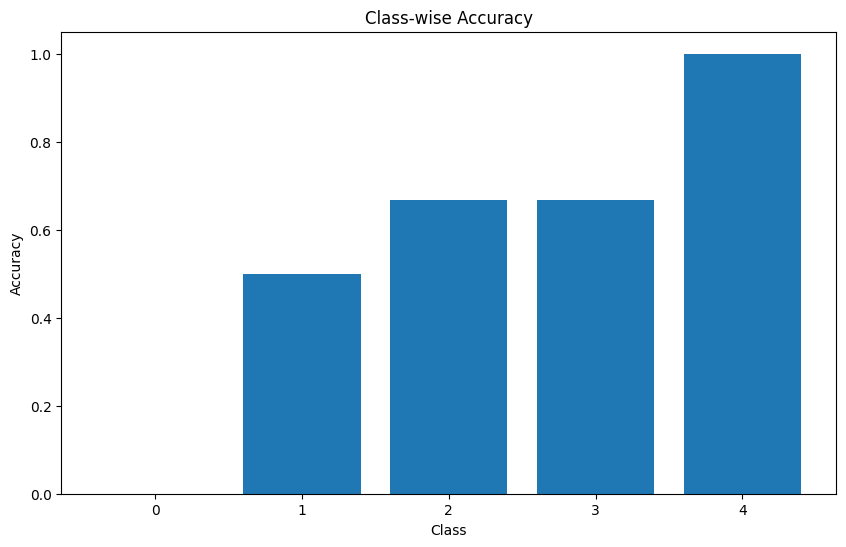

Epoch [50/50], Test Loss: 1.1120, Train Accuracy: 87.51%, Test Accuracy: 80.00%


"\n    cm = confusion_matrix(y_target, y_prediction)\n    plt.figure(figsize=(12, 10))\n    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')\n    plt.xlabel('Predicted')\n    plt.ylabel('True')\n    plt.title('Confusion Matrix')\n    plt.show()\n    test_loss /= len(test_dataloader)\n    test_accuracy = 100 * correct_test / total_test\n    test_accuracies.append(test_accuracy)\n"

In [ ]:
# Test Loop
test_accuracies = []
model.eval()
correct_test = 0
total_test = 0
test_loss = 0.0
num_classes = 5

with torch.no_grad():
  for batch_x, batch_y in test_dataloader:
    outputs = model(batch_x)
    batch_y = batch_y.view(-1, 1) # reshaping to conform to outputs prediction shape
    batch_y = batch_y.squeeze(1).long() # removing the extra dimension
    test_loss = criterion(outputs, batch_y)


    _, predicted = torch.max(outputs.data, 1) # once you make predictions, torch.max takes the max probability for each example and selects the corresponding class
    y_prediction = predicted.cpu().numpy()
    y_target = batch_y.cpu().numpy()
    total_test += batch_y.size(0)
    print(f'Output Prediction: {predicted}')
    print(f'Target Prediction: {batch_y}')
    correct_test += (predicted == batch_y).sum().item() # how many predictions were correct

    class_accuracies = []
    for i in range(num_classes):
      class_indices = [j for j, x in enumerate(y_target) if x == i]
      class_accuracy = accuracy_score([y_target[j] for j in class_indices], [y_prediction[j] for j in class_indices])
      class_accuracies.append(class_accuracy)

plt.figure(figsize=(10, 6))
plt.bar(range(num_classes), class_accuracies)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.xticks(range(num_classes))
plt.show()

print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

'''
    cm = confusion_matrix(y_target, y_prediction)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    test_loss /= len(test_dataloader)
    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)
'''

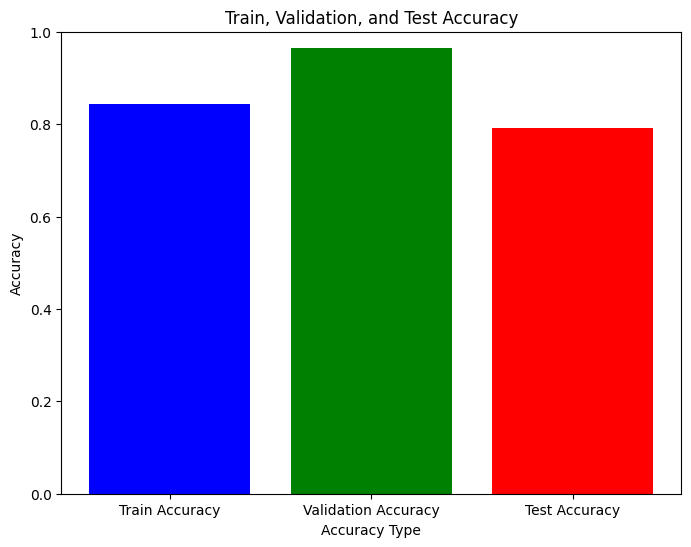

In [ ]:
# Define the accuracies
train_accuracy = train_accuracies[-1]/100
validation_accuracy = val_accuracies[-1]/100
test_accuracy = test_accuracies[-1]/100

# Define the labels and the values
labels = ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, validation_accuracy, test_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracy')
plt.show()
